In [1]:
import scipy
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans

In [3]:
#download the program and dataset from github 
!pip install wget
!rm master.zip
!rm -r wktest-master/
!wget https://github.com/wk821917/wktest/archive/master.zip
!unzip master
!ls

Requirement not upgraded as not directly required: wget in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
--2018-07-25 07:10:33--  https://github.com/wk821917/wktest/archive/master.zip
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/wk821917/wktest/zip/master [following]
--2018-07-25 07:10:33--  https://codeload.github.com/wk821917/wktest/zip/master
Resolving codeload.github.com (codeload.github.com)... 192.30.253.121, 192.30.253.120
Connecting to codeload.github.com (codeload.github.com)|192.30.253.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681141 (665K) [application/zip]
Saving to: ‘master.zip’

100%[======================================>] 681,141     --.-K/s   in 0.1s    

2018-07-25 07:10:33 (4.39 MB/s) - ‘master.zip’ saved [681141/681141]

Archive:  master.zi

In [4]:
!ls wktest-master/

actdata.csv  ML_KMeans.py		     README.md
lstmtest.py  MY_IBM_TEST_3__r1ge3tK7X.ipynb  water-tilt.csv


In [5]:
data = pd.read_csv('wktest-master/water-tilt.csv')

In [6]:
data = data.iloc[:5000,-2:]

In [7]:
data.shape

(5000, 2)

In [8]:
#calculate quadratic sum of xtilt and ytilt
data_calcu = data.iloc[:,0]**2+data.iloc[:,1]**2

In [9]:
data.index

RangeIndex(start=0, stop=5000, step=1)

In [10]:
DataFrame(data_calcu)

,0
0,30.496578
1,30.498779
2,30.292764
3,30.325230
4,30.329744
5,30.324112
6,30.304377
7,30.307335
8,30.301641
9,30.303113


In [11]:
#define kmeans with five clusters
kmeans = KMeans(n_clusters=5)

In [12]:
#train with the calcukate data
kmeans.fit(DataFrame(data_calcu))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
kmeans.predict(DataFrame(data_calcu))

array([1, 1, 4, ..., 0, 0, 0], dtype=int32)

In [14]:
#add 'kind' and 'calcu' column
data['kind'] = kmeans.predict(DataFrame(data_calcu))
data['calcu'] = data_calcu

In [15]:
data

,xtilt,ytilt,kind,calcu
0,-5.378614,-1.251834,1,30.496578
1,-5.378447,-1.253432,1,30.498779
2,-5.358685,-1.255891,4,30.292764
3,-5.361903,-1.255081,4,30.325230
4,-5.362575,-1.254008,4,30.329744
5,-5.361732,-1.255367,4,30.324112
6,-5.360670,-1.252035,4,30.304377
7,-5.360808,-1.252628,4,30.307335
8,-5.360177,-1.253056,4,30.301641
9,-5.360159,-1.253719,4,30.303113


In [16]:
#make connection between color and kind
color_dict = {0:'orange',1:'gray',2:'blue',3:'green',4:'purple'}#,5:'red',6:"yellow",7:'black',8:"pink"}

In [17]:
#color for plot
color_list = []
for i in data.iloc[:,-2]:
    color_list.append(color_dict[i])

In [18]:
color_list

['gray',
 'gray',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'p

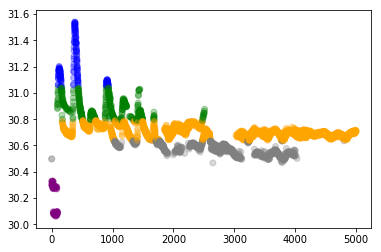

In [19]:
plt.scatter(data.index,data.iloc[:,-1],alpha=0.3,c=np.array(color_list))
plt.savefig('./Kmeans_w_t.png')

In [20]:
data

,xtilt,ytilt,kind,calcu
0,-5.378614,-1.251834,1,30.496578
1,-5.378447,-1.253432,1,30.498779
2,-5.358685,-1.255891,4,30.292764
3,-5.361903,-1.255081,4,30.325230
4,-5.362575,-1.254008,4,30.329744
5,-5.361732,-1.255367,4,30.324112
6,-5.360670,-1.252035,4,30.304377
7,-5.360808,-1.252628,4,30.307335
8,-5.360177,-1.253056,4,30.301641
9,-5.360159,-1.253719,4,30.303113


In [21]:
#show the relationship between kind and calcu
kdmin_dict = {}
for i in range(5):
    kdmin_dict[float(data[data['kind']==i].iloc[:,-1].max())] = i

In [23]:
kdmin_dict

{30.329827267170508: 4,
 30.636416697409313: 1,
 30.789590567297356: 0,
 31.045036203698693: 3,
 31.539271963493828: 2}

In [24]:
#define 'level' column and fill with None
data['level'] = np.nan

In [25]:
data

,xtilt,ytilt,kind,calcu,level
0,-5.378614,-1.251834,1,30.496578,NaN
1,-5.378447,-1.253432,1,30.498779,NaN
2,-5.358685,-1.255891,4,30.292764,NaN
3,-5.361903,-1.255081,4,30.325230,NaN
4,-5.362575,-1.254008,4,30.329744,NaN
5,-5.361732,-1.255367,4,30.324112,NaN
6,-5.360670,-1.252035,4,30.304377,NaN
7,-5.360808,-1.252628,4,30.307335,NaN
8,-5.360177,-1.253056,4,30.301641,NaN
9,-5.360159,-1.253719,4,30.303113,NaN


In [26]:
kdmin_dict[min(kdmin_dict.keys())]

4

In [27]:
data[data['kind']==kdmin_dict[min(kdmin_dict.keys())]].index

Int64Index([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
            36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
            53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
            70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
            87, 88, 89, 90, 91, 92, 93, 94, 95],
           dtype='int64')

In [28]:
#calculate level depends on kind and min(calcu[kind])
for i in range(5,0,-1):    
    for j in (data[data['kind']==kdmin_dict[min(kdmin_dict.keys())]].index):
        data.iloc[j,-1] = int(i)
    kdmin_dict.pop(min(kdmin_dict.keys()))

In [29]:
data

,xtilt,ytilt,kind,calcu,level
0,-5.378614,-1.251834,1,30.496578,4.0
1,-5.378447,-1.253432,1,30.498779,4.0
2,-5.358685,-1.255891,4,30.292764,5.0
3,-5.361903,-1.255081,4,30.325230,5.0
4,-5.362575,-1.254008,4,30.329744,5.0
5,-5.361732,-1.255367,4,30.324112,5.0
6,-5.360670,-1.252035,4,30.304377,5.0
7,-5.360808,-1.252628,4,30.307335,5.0
8,-5.360177,-1.253056,4,30.301641,5.0
9,-5.360159,-1.253719,4,30.303113,5.0


In [30]:
np.unique(data.iloc[:,-1])

array([ 1.,  2.,  3.,  4.,  5.])

In [31]:
data.to_csv('./Kmeans_w_t.csv')

In [32]:
!ls

Kmeans_w_t.csv	Kmeans_w_t.png	master.zip  wktest-master


In [33]:
import ibm_boto3
from ibm_botocore.client import Config
import os
import json
import warnings
import time

In [34]:
#cos config
cos_credentials = {
  "apikey": "eUU7ks-YstaFkkEjoIVEsUkvU2_mUq-tcwfyQamY6kim",
  "cos_hmac_keys": {
    "access_key_id": "f1ac76f0074244f9a07d5debb286f122",
    "secret_access_key": "c623bb131af41897c674eec7f7700446fdbeecf6c993d105"
  },
  "endpoints": "https://cos-service.bluemix.net/endpoints",
  "iam_apikey_description": "Auto generated apikey during resource-key operation for Instance - crn:v1:bluemix:public:cloud-object-storage:global:a/4171c5a3fdf4490ba445218f5bcdea3a:ddbf4da0-34e3-4055-aba2-6b23b0b2b78b::",
  "iam_apikey_name": "auto-generated-apikey-f1ac76f0-0742-44f9-a07d-5debb286f122",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/4171c5a3fdf4490ba445218f5bcdea3a::serviceid:ServiceId-ed5194dd-dab1-411b-b53c-df5f95c3d594",
  "resource_instance_id": "crn:v1:bluemix:public:cloud-object-storage:global:a/4171c5a3fdf4490ba445218f5bcdea3a:ddbf4da0-34e3-4055-aba2-6b23b0b2b78b::"
}

api_key = cos_credentials['apikey']
service_instance_id = cos_credentials['resource_instance_id']

In [35]:
service_endpoint = 'https://s3-api.us-geo.objectstorage.softlayer.net'
auth_endpoint = 'https://iam.bluemix.net/oidc/token'

In [36]:
cos = ibm_boto3.resource ('s3',
                         ibm_api_key_id=api_key,
                         ibm_service_instance_id=service_instance_id,
                         ibm_auth_endpoint=auth_endpoint,
                         config=Config(signature_version='oauth'),
                         endpoint_url=service_endpoint)

In [37]:
#create a new bucket
bucketname = 'wktest3'
if not cos.Bucket(bucketname) in cos.buckets.all():
    print('Creating bucket "{}"...'.format(bucketname))
    try:
        cos.create_bucket(Bucket=bucketname)
    except ibm_boto3.exceptions.ibm_botocore.client.ClientError as e:
        print('Error: {}.'.format(e.response['Error']['Message']))

In [38]:
#show all buckets
print(list(cos.buckets.all()))

[s3.Bucket(name='newproject-donotdelete-pr-fv0nfbh7kpcho3'), s3.Bucket(name='wktest1'), s3.Bucket(name='wktest2'), s3.Bucket(name='wktest3')]


In [41]:
!mkdir data_dir
!mv ./Kmeans_w_t.csv data_dir
!mv ./Kmeans_w_t.png data_dir

In [42]:
!ls
!ls data_dir

data_dir  master.zip  wktest-master
Kmeans_w_t.csv	Kmeans_w_t.png


In [44]:
#upload the result to cos
bucket_name = bucketname
bucket_obj = cos.Bucket(bucket_name)
data_dir = 'data_dir'
for filename in os.listdir(data_dir):
    with open(os.path.join(data_dir, filename), 'rb') as data: 
        bucket_obj.upload_file(os.path.join(data_dir, filename), filename)
        print('{} is uploaded.'.format(filename))

Kmeans_w_t.csv is uploaded.
Kmeans_w_t.png is uploaded.
